In [2]:
# Using the tweepy handler to collect the tweets

# Retrieving the consumer key, consumer secret, access token and access secret from the tokens.py File
import Tokens

import tweepy
from tweepy import OAuthHandler
import pandas as pd
import sys
encodingTot = sys.stdout.encoding or 'utf-8'
 
consumer_key = Tokens.consumer_key
consumer_secret = Tokens.consumer_secret
 
access_token = Tokens.access_token
access_secret = Tokens.access_secret
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [3]:
# testing authentication

try:
    api.verify_credentials()
    print("Authentication Successful")
except:
    print("Error during authentication")

Authentication Successful


In [2]:
import datetime

columns = ['id','name', 'tweet', 'retweets_count','location','created','followers_count','geo','hashtags','verified','retweeted']
 
tweet_dataframe = pd.DataFrame(columns=columns)
 
num_tweets = 50

for tweet in tweepy.Cursor(api.search_full_archive,environment_name = "prod", query="elections lang:en",fromDate="202003012315",toDate="202011082315",maxResults="100").items(num_tweets):


    lenDF = len(tweet_dataframe)
 
    tweet_dataframe.loc[lenDF] = [tweet.user.id,tweet.user.screen_name, tweet.text, tweet.retweet_count, tweet.user.location,tweet.created_at.strftime("%d-%b-%Y"),tweet.user.followers_count,tweet.geo,tweet.entities["hashtags"],tweet.user.verified,tweet.retweeted]
         
tweet_dataframe.to_csv("2021Tweets.csv",mode='a', sep='\t', encoding = encodingTot,header=False)
 
tweet_dataframe = pd.read_csv(open('2021Tweets.csv','rU'), sep='\t', engine='c')
 
tweet_dataframe.head()

NameError: name 'tweepy' is not defined

# Run code from here


In [58]:
import pandas as pd
import numpy as np
import string
import re
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")

def preprocessing(df):
    lemmatizer_filter = WordNetLemmatizer()
    
    # putting the tweets into a list
    tweet_list = df['tweet'].tolist()
    
    for i in range(len(tweet_list)):
        # By the usage of regex lines of code
        # RRemove special characters (eg: starting with @ Links)
        tweet_list[i]= ' '.join(re.sub("(@[A-Za-z0-9]+)", " ", tweet_list[i]).split()) 
        tweet_list[i]= ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet_list[i]).split()) 
        tweet_list[i]= ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet_list[i]).split()) 
        # Remove url's starting with http and https
        tweet_list[i]= ' '.join(re.sub("^rt|http.+?", " ", tweet_list[i]).split())
        # removing the html tags which are unnecessary
        html_tags_toremove = re.compile('<.*?>')
        # Deleting the unwanted stopwords using nltk library
        tweet_list[i]=' '.join([token.lower() for token in tweet_list[i].split() if len(token)>3 and token.lower() not in stopwords.words('english')])
        tweet_list[i]=' '.join(re.sub(html_tags_toremove, '', tweet_list[i]).split())
        tweet_list[i] = ' '.join([lemmatizer_filter.lemmatize(word) for word in tweet_list[i].split()])
        # Remove RT->signifies Retweet keyword in the tweet list
        tweet_list[i]=' '.join(re.sub("RT", " ", tweet_list[i]).split())
        tweet_list[i]=' '.join(re.sub("rt", " ", tweet_list[i]).split())
        tweet_list[i]=' '.join(re.sub("rt", " ", tweet_list[i]).split())
        tweet_list[i]=' '.join(re.sub("r'(?:^|\s)([#?])(\w+)'", " ", tweet_list[i]).split())
#     tweet_final= [' '.join(item) for item in tweet_list]
    
    df['tweet']=tweet_list
       
    '''
    Return dataframe here
    '''
    return df
    


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/priyanka/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [62]:
# precovid_df= pd.read_csv(open('2019Tweets Jan - May 550.csv','rU',encoding='utf-8'), sep='\t', engine='c')
# covid_timeline= pd.read_csv(open('2020Tweets Random - 200.csv','rU',encoding='utf-8'), sep='\t', engine='c')

precovid_df= pd.read_csv(open('2019UpdatedTweets.csv','rU',encoding='utf-8'), sep='\t', engine='c')
covid_timeline= pd.read_csv(open('2020UpdatedTweets.csv','rU',encoding='utf-8'), sep='\t', engine='c')


In [63]:
def cleaned_hashtags(x):
    y = x.split(',')
    tags = []
    for tag in y:
        if tag.find('text') != -1:
            tags.append(tag.split(':')[-1].strip(' ').strip('\''))
    return ' '.join(tags) 

In [64]:
precovid_df

,Unnamed: 0,id,name,tweet,retweets_count,location,created,followers_count,geo,hashtags,verified,retweeted
0,0,882717099046653952,iIIumilovebot,God has left us,0,NaN,08-Feb-2019,84,NaN,[],False,False
1,1,111993437,syntax72,Drinking a Marionberry (Batch 2) by @SchrammsM...,0,NaN,08-Feb-2019,125,"{'type': 'Point', 'coordinates': [42.4605, -83...",[],False,False
2,2,435948890,DanTheeMan_65,@SiegmannDennis I’m surprised you aren’t there!,0,"Ardmore, OK",08-Feb-2019,466,NaN,[],False,False
3,3,20207761,GreyCrossStudio,The 40/60 Rule\nhttps://t.co/cEZ1lmCKo5\n\nhtt...,0,"New Orleans, Louisiana",08-Feb-2019,16809,NaN,"[{'text': 'art', 'indices': [65, 69]}, {'text'...",False,False
4,4,280349022,evavictorious,on this journey to true happiness ✨🙏🏽,0,"New Jersey, USA",08-Feb-2019,1273,NaN,[],False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,95,47673131,confusedabout,The Dems have no low. https://t.co/OhBvhvihlm,0,"Dallas, Texas",08-Dec-2019,4716,NaN,[],False,False
1096,96,902269848666882048,DCalhounDB,Shame @TonyTheTiger_SB #DoBetter https://t.co/...,0,"Tempe, AZ",08-Dec-2019,293,NaN,"[{'text': 'DoBetter', 'indices': [23, 32]}]",False,False
1097,97,627577775,EnnoFarm,@newlandfarm If she’s friendly as well I might...,0,North Carolina,08-Dec-2019,3908,NaN,[],False,False
1098,98,544947579,MaribelBrandt,6 of the 9 supreme court judges were nominated...,0,NaN,08-Dec-2019,6,NaN,[],False,False


In [65]:
precovid_df['hashtags'] = precovid_df['hashtags'].apply(lambda x : cleaned_hashtags(x))
covid_timeline['hashtags'] = covid_timeline['hashtags'].apply(lambda x : cleaned_hashtags(x))

In [66]:
precovid_df

,Unnamed: 0,id,name,tweet,retweets_count,location,created,followers_count,geo,hashtags,verified,retweeted
0,0,882717099046653952,iIIumilovebot,God has left us,0,NaN,08-Feb-2019,84,NaN,,False,False
1,1,111993437,syntax72,Drinking a Marionberry (Batch 2) by @SchrammsM...,0,NaN,08-Feb-2019,125,"{'type': 'Point', 'coordinates': [42.4605, -83...",,False,False
2,2,435948890,DanTheeMan_65,@SiegmannDennis I’m surprised you aren’t there!,0,"Ardmore, OK",08-Feb-2019,466,NaN,,False,False
3,3,20207761,GreyCrossStudio,The 40/60 Rule\nhttps://t.co/cEZ1lmCKo5\n\nhtt...,0,"New Orleans, Louisiana",08-Feb-2019,16809,NaN,art artist artists,False,False
4,4,280349022,evavictorious,on this journey to true happiness ✨🙏🏽,0,"New Jersey, USA",08-Feb-2019,1273,NaN,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,95,47673131,confusedabout,The Dems have no low. https://t.co/OhBvhvihlm,0,"Dallas, Texas",08-Dec-2019,4716,NaN,,False,False
1096,96,902269848666882048,DCalhounDB,Shame @TonyTheTiger_SB #DoBetter https://t.co/...,0,"Tempe, AZ",08-Dec-2019,293,NaN,DoBetter,False,False
1097,97,627577775,EnnoFarm,@newlandfarm If she’s friendly as well I might...,0,North Carolina,08-Dec-2019,3908,NaN,,False,False
1098,98,544947579,MaribelBrandt,6 of the 9 supreme court judges were nominated...,0,NaN,08-Dec-2019,6,NaN,,False,False


In [67]:
def find_top_n_hashtags(df, n):
    tags = []
    tag_pattern = re.compile(r"#[a-zA-Z]+")
    tag_matches = list(df['tweet'].apply(tag_pattern.findall))
    tagStore = {}
    for item in tag_matches:
        for token_match in item:
            if token_match not in tagStore.keys():
                tagStore[token_match] = 1
            else:
                tagStore[token_match] = tagStore[token_match]+1
    
    ordList =sorted(tagStore.items(), key=lambda x:x[1])
    ordList = ordList[::-1]
    # Differentiating hashtags into separate lists
    ordValues = []
    ordKeys = []
    for i in ordList[0:n]:
        ordKeys.append(i[0])
        ordValues.append(i[1])
    
    return ordKeys,ordValues

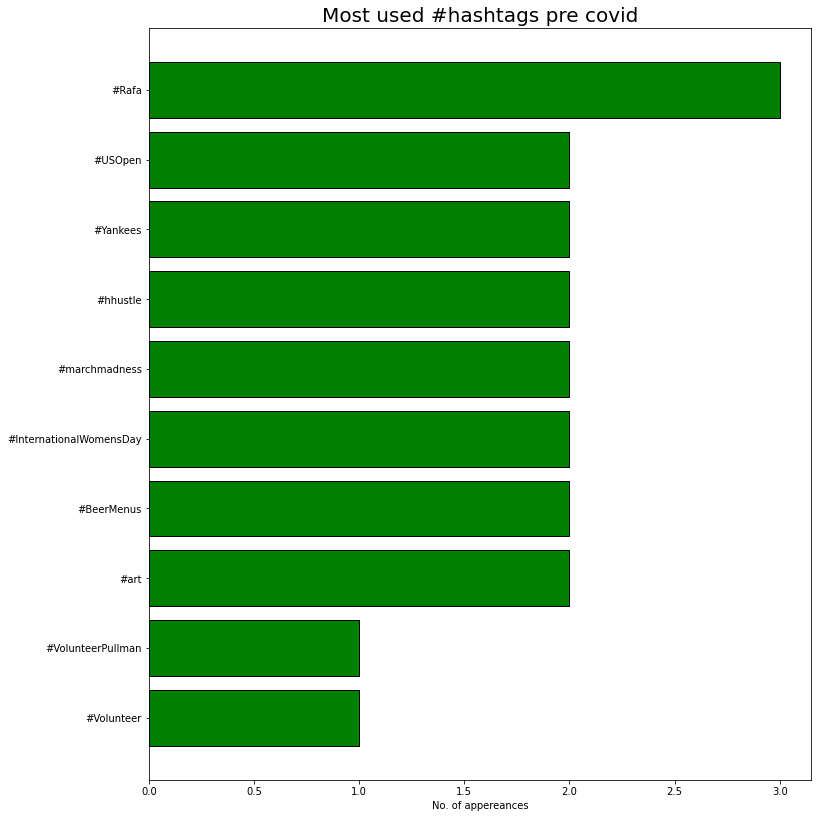

In [68]:
tagKeys, tagValues = find_top_n_hashtags(precovid_df, 10)

# Visualization for retrieving the most used hashtags

fig, ax = plt.subplots(figsize = (12,12))
yCoords = np.arange(len(tagKeys))
ax.barh(yCoords ,list(tagValues)[::-1], align='center', color = 'green', edgecolor = 'black', linewidth=1)
ax.set_yticks(yCoords)
ax.set_yticklabels(list(tagKeys)[::-1])
ax.set_xlabel("No. of appereances")
ax.set_title("Most used #hashtags pre covid", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()
fig.savefig("hashtags_precovid.png", dpi=1400)

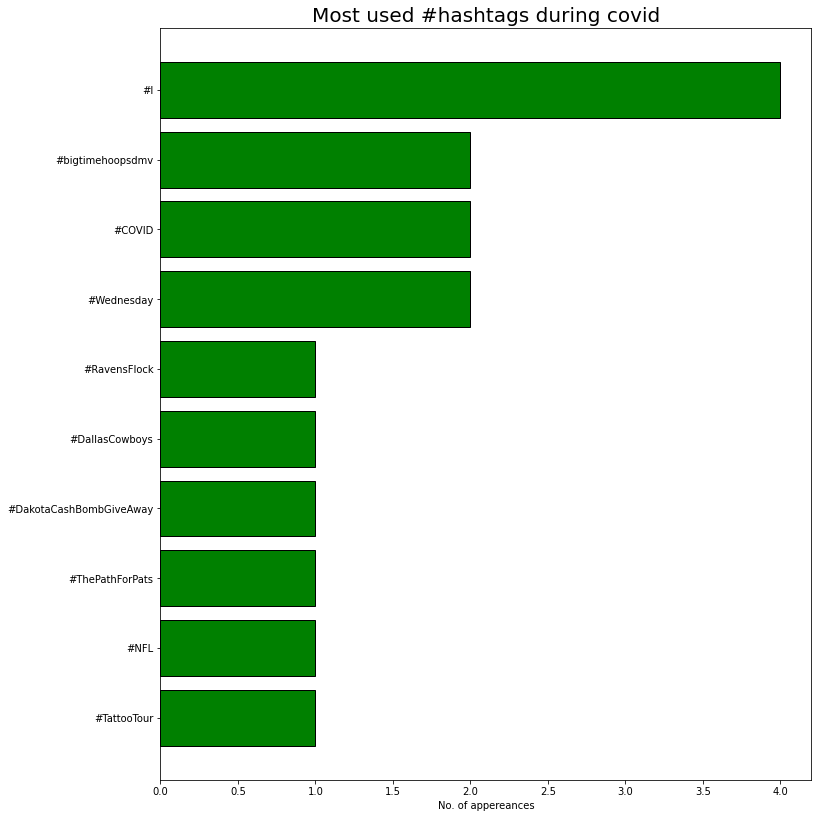

In [69]:
tagKeys, tagValues = find_top_n_hashtags(covid_timeline, 10)
#Plotting a graph with the most used hashtags
fig, ax = plt.subplots(figsize = (12,12))
yCoords = np.arange(len(tagKeys))
ax.barh(yCoords ,list(tagValues)[::-1], align='center', color = 'green', edgecolor = 'black', linewidth=1)
ax.set_yticks(yCoords)
ax.set_yticklabels(list(tagKeys)[::-1])
ax.set_xlabel("No. of appereances")
ax.set_title("Most used #hashtags during covid", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()
fig.savefig("hashtags_covid.png", dpi=1400)

In [70]:
def find_top_n_mentioned_accounts(df, n):
    observedAcc = re.compile(r"@[a-zA-Z_]+")
    observedMatches = list(df['tweet'].apply(observedAcc.findall))
    storeForMentions = {}
    for observedMatch in observedMatches:
        for currentMatch in observedMatch:
            if currentMatch not in storeForMentions.keys():
                storeForMentions[currentMatch] = 1
            else:
                storeForMentions[currentMatch] = storeForMentions[currentMatch]+1
                
    ordList = sorted(storeForMentions.items(), key=lambda x:x[1])
    ordList = ordList[::-1]

    ordVals = []
    ordKeys = []
    for i in ordList[0:n]:
        ordKeys.append(i[0])
        ordVals.append(i[1])
    
    return ordKeys, ordVals

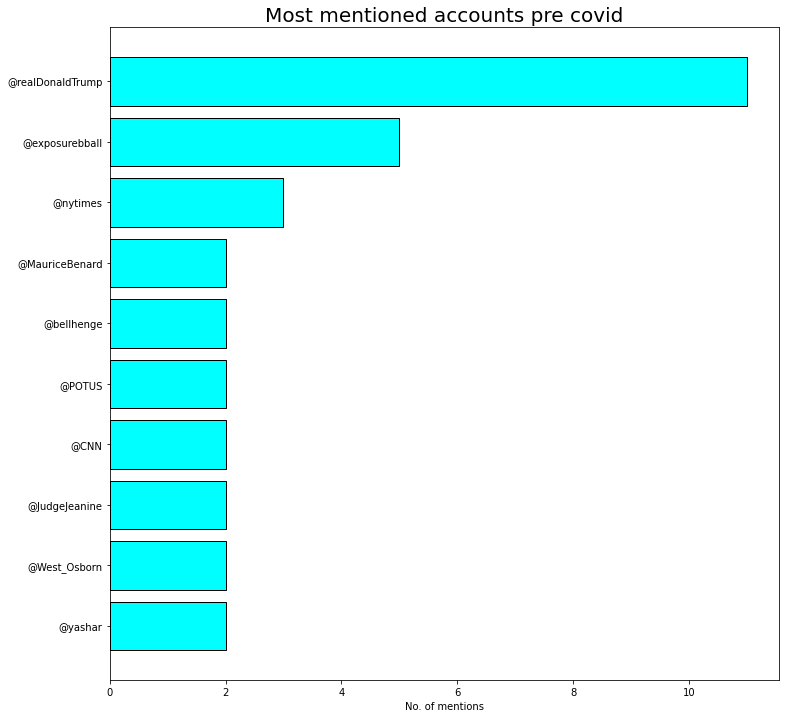

In [71]:
m_ord_keys , m_ord_vals = find_top_n_mentioned_accounts(precovid_df, 10)
fig, ax = plt.subplots(figsize = (12,12))
yCoords = np.arange(len(m_ord_vals))
ax.barh(yCoords ,list(m_ord_vals)[::-1], align='center', color = 'cyan', edgecolor = 'black', linewidth=1)
ax.set_yticks(yCoords )
ax.set_yticklabels(list(m_ord_keys)[::-1])
ax.set_xlabel("No. of mentions")
ax.set_title("Most mentioned accounts pre covid", fontsize = 20)
plt.show()
fig.savefig("accounts_precovid.png", dpi=1400)

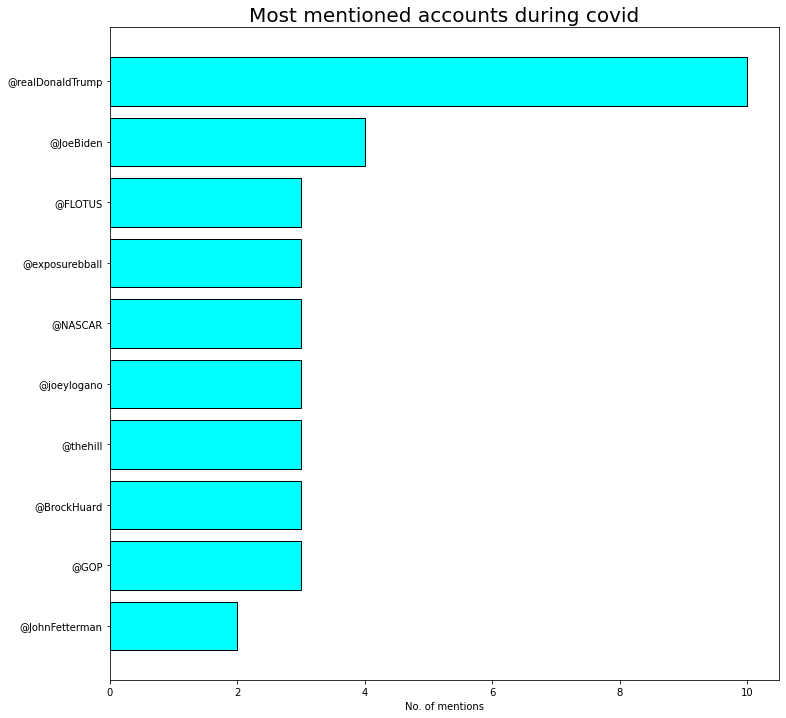

In [72]:
m_ord_keys , m_ord_vals = find_top_n_mentioned_accounts(covid_timeline, 10)
fig, ax = plt.subplots(figsize = (12,12))
yCoords = np.arange(len(m_ord_vals))
ax.barh(yCoords ,list(m_ord_vals)[::-1], align='center', color = 'cyan', edgecolor = 'black', linewidth=1)
ax.set_yticks(yCoords )
ax.set_yticklabels(list(m_ord_keys)[::-1])
ax.set_xlabel("No. of mentions")
ax.set_title("Most mentioned accounts during covid", fontsize = 20)
plt.show()
fig.savefig("accounts_covid.png", dpi=1400)

In [73]:
precovid_cleaned_df = preprocessing(precovid_df)
covid_timeline_cleaned_df= preprocessing(covid_timeline)


In [74]:
# Removing geo column since it is empty (nan)
del precovid_cleaned_df['geo']
del covid_timeline_cleaned_df['geo']

In [75]:
# Removing dummy column since it is empty (nan)

del precovid_cleaned_df['Unnamed: 0']
del covid_timeline_cleaned_df['Unnamed: 0']

In [76]:
precovid_cleaned_df.head()

,id,name,tweet,retweets_count,location,created,followers_count,hashtags,verified,retweeted
0,882717099046653952,iIIumilovebot,left,0,NaN,08-Feb-2019,84,,False,False
1,111993437,syntax72,drinking marionberry batch schramm mead ip9wbe...,0,NaN,08-Feb-2019,125,,False,False
2,435948890,DanTheeMan_65,surprised,0,"Ardmore, OK",08-Feb-2019,466,,False,False
3,20207761,GreyCrossStudio,rule cez1lmcko5 lybcj5j9c7 a ist a ist ibhziex9hi,0,"New Orleans, Louisiana",08-Feb-2019,16809,art artist artists,False,False
4,280349022,evavictorious,journey true happiness,0,"New Jersey, USA",08-Feb-2019,1273,,False,False


In [77]:
covid_timeline_cleaned_df.head()

,id,name,tweet,retweets_count,location,created,followers_count,hashtags,verified,retweeted
0,121626173,LajoyJohnson,hungry know round,0,NaN,08-Feb-2020,1138,,False,False
1,798852913959272449,AStrangerNobody,chicken looking light skin,0,Everywhere 📍,08-Feb-2020,3047,,False,False
2,2457267169,veronican_t,hell gamecube game still expensive wanna back ...,0,"Denver, CO",08-Feb-2020,71,,False,False
3,213004227,MistahKelly,really dumb response would ooomnsb2n2,0,"Brooklyn, NY",08-Feb-2020,376,,False,False
4,19637715,tillyxluna,like half piece send help handle food dense go...,0,NaN,08-Feb-2020,696,,False,False


In [78]:
precovid_cleaned_df.head(20)

,id,name,tweet,retweets_count,location,created,followers_count,hashtags,verified,retweeted
0,882717099046653952,iIIumilovebot,left,0,NaN,08-Feb-2019,84,,False,False
1,111993437,syntax72,drinking marionberry batch schramm mead ip9wbe...,0,NaN,08-Feb-2019,125,,False,False
2,435948890,DanTheeMan_65,surprised,0,"Ardmore, OK",08-Feb-2019,466,,False,False
3,20207761,GreyCrossStudio,rule cez1lmcko5 lybcj5j9c7 a ist a ist ibhziex9hi,0,"New Orleans, Louisiana",08-Feb-2019,16809,art artist artists,False,False
4,280349022,evavictorious,journey true happiness,0,"New Jersey, USA",08-Feb-2019,1273,,False,False
5,1906256726,dallylane,someone tell hell snowing abilene texas packin...,1,NaN,08-Feb-2019,2439,,False,False
6,415012178,brenden_i,update there dril tweet course f1qtmlqagu,0,"San Marcos, Texas",08-Feb-2019,716,,False,False
7,185077134,cma_312,sjpeace love post restore hope humanity daily ...,0,Miami,08-Feb-2019,37,,False,False
8,459542841,grizvacation,kingdom living alternative reality threat sign...,3,"Dallas, Texas",08-Feb-2019,2752,,False,False
9,242569866,KillaCamm1_,first time life kind want strip club,0,614,08-Feb-2019,552,,False,False


In [79]:
covid_timeline_cleaned_df.head(20)

,id,name,tweet,retweets_count,location,created,followers_count,hashtags,verified,retweeted
0,121626173,LajoyJohnson,hungry know round,0,NaN,08-Feb-2020,1138,,False,False
1,798852913959272449,AStrangerNobody,chicken looking light skin,0,Everywhere 📍,08-Feb-2020,3047,,False,False
2,2457267169,veronican_t,hell gamecube game still expensive wanna back ...,0,"Denver, CO",08-Feb-2020,71,,False,False
3,213004227,MistahKelly,really dumb response would ooomnsb2n2,0,"Brooklyn, NY",08-Feb-2020,376,,False,False
4,19637715,tillyxluna,like half piece send help handle food dense go...,0,NaN,08-Feb-2020,696,,False,False
5,4191239027,quis__custodiet,2314z n960la county angeles 0146 w118 1221 alt...,0,NaN,08-Feb-2020,92,,False,False
6,2817400207,YUNGEM0,kaytranada show sold,0,1428 Elm Street,08-Feb-2020,472,,False,False
7,2958845407,94worldspremier,poppin 5fplrvhlpd,0,"Georgetown, KY ➡️ Boise, ID",08-Feb-2020,667,,False,False
8,2320001635,Dannightwalker,high wing carry nficjwphwn,0,"Florida,USA,Kissimmee.",08-Feb-2020,217,,False,False
9,45180407,MagicDJ1,damn bunch anti american coward ftsahynzmi,0,"Florida, USA",08-Feb-2020,374,,False,False


In [80]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

import seaborn as sns
from matplotlib import pyplot

portStem = PorterStemmer()

def text_blob_visualization(given_df):
    corpus = []
    for i in range(len(given_df)):
        tweet_text = re.sub('[^a-zA-Z0-9]', ' ', given_df['tweet'][i])
        tweet_text = tweet_text.split()
        tweet_text = [portStem.stem(token) for token in tweet_text if not token in set(stopwords.words('english'))]
        tweet = ' '.join(tweet_text)
        corpus.append(tweet)

    # Generate wordcloud visualization
    storeOfWords = ' '.join([c for c in corpus])
    figWord = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(storeOfWords)
    plt.figure(figsize=(10, 7))
    plt.imshow(figWord, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    return 

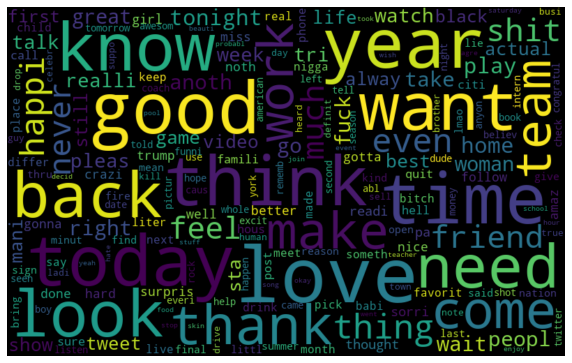

In [81]:
# Wordcloud visualization for precovid df

text_blob_visualization(precovid_cleaned_df)

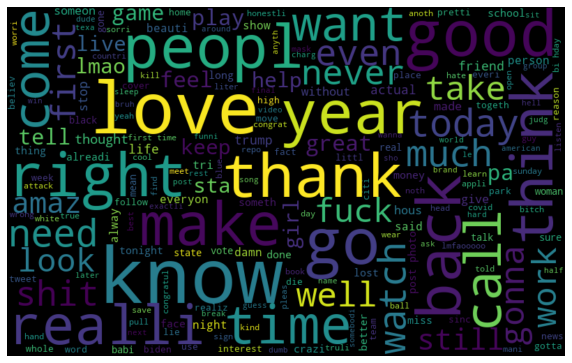

In [82]:
# Wordcloud visualization for covid df

text_blob_visualization(covid_timeline_cleaned_df)

<AxesSubplot:ylabel='followers_count'>

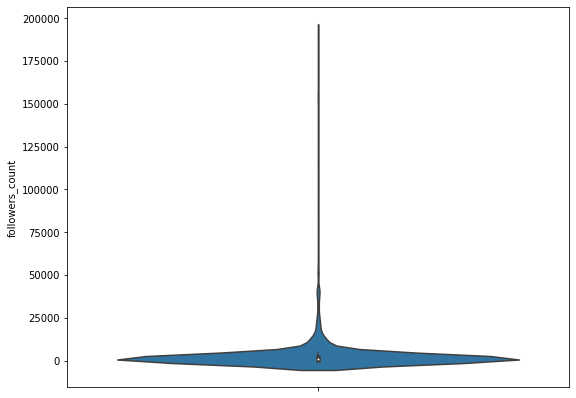

In [83]:



fig, ax = pyplot.subplots(figsize =(9, 7)) 
sns.violinplot( ax = ax, y = precovid_cleaned_df["followers_count"] ) 

<AxesSubplot:ylabel='followers_count'>

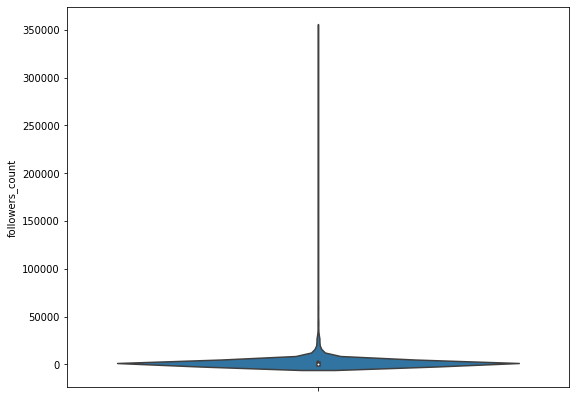

In [84]:
import seaborn as sns

fig, ax = pyplot.subplots(figsize =(9, 7)) 
sns.violinplot( ax = ax, y = covid_timeline_cleaned_df["followers_count"] ) 

In [85]:
# word2vec embedding visualization

from gensim.models import Word2Vec
import scipy
nltk.download('punkt')

def word2vec_embeddings(df):
    text= ' '.join(df['tweet'])
    sentence=text.split()
    tokens=[nltk.word_tokenize(words) for words in sentence]
    print(len(tokens))
    model = Word2Vec(tokens[:100],size=50,sg=1,min_count=1)
    # Learned vocabulary
    words=list(model.wv.vocab)
    X=model[model.wv.vocab]
    newdf=pd.DataFrame(X)
        
    #Computing the correlation matrix
    X_corr=newdf.corr()

    #Computing eigen values and eigen vectors
    values,vectors=scipy.linalg.eigh(X_corr)

    #Sorting the eigen vectors coresponding to eigen values in descending order
    args = (-values).argsort()
    values = vectors[args]
    vectors = vectors[:, args]

    #Taking first 2 components which explain maximum variance for projecting
    new_vectors=vectors[:,:2]

    #Projecting it onto new dimesion with 2 axis
    neww_X=np.dot(X,new_vectors)
    
    plt.figure(figsize=(13,7))
    plt.scatter(neww_X[:,0],neww_X[:,1],linewidths=10,color='blue')
    plt.xlabel("PC1",size=15)
    plt.ylabel("PC2",size=15)
    plt.title("Word Embedding Space",size=20)
    vocab=list(model.wv.vocab)
    for i, word in enumerate(vocab):
        plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]))

[nltk_data] Downloading package punkt to /Users/priyanka/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


6288


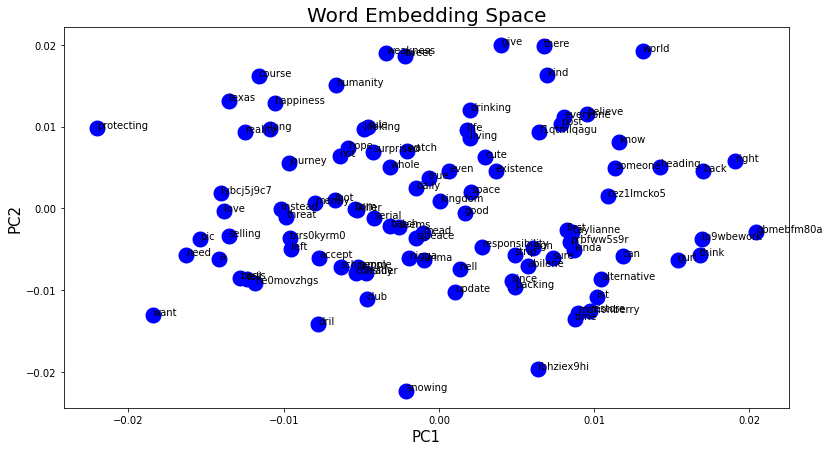

In [86]:
word2vec_embeddings(precovid_cleaned_df)

6264


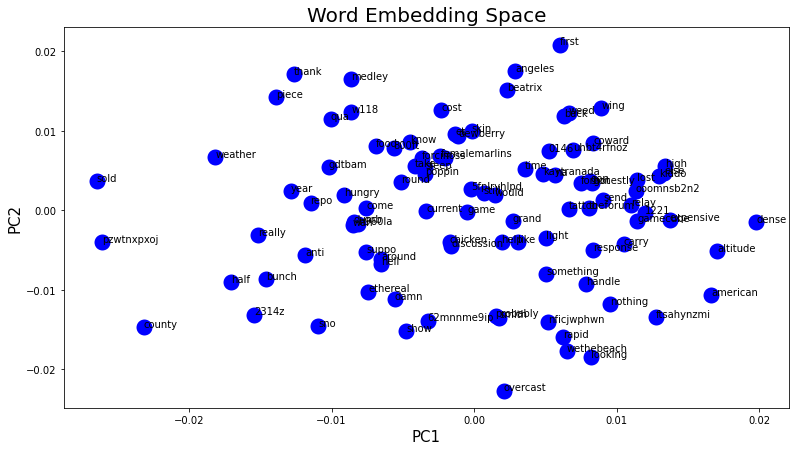

In [87]:
word2vec_embeddings(covid_timeline_cleaned_df)

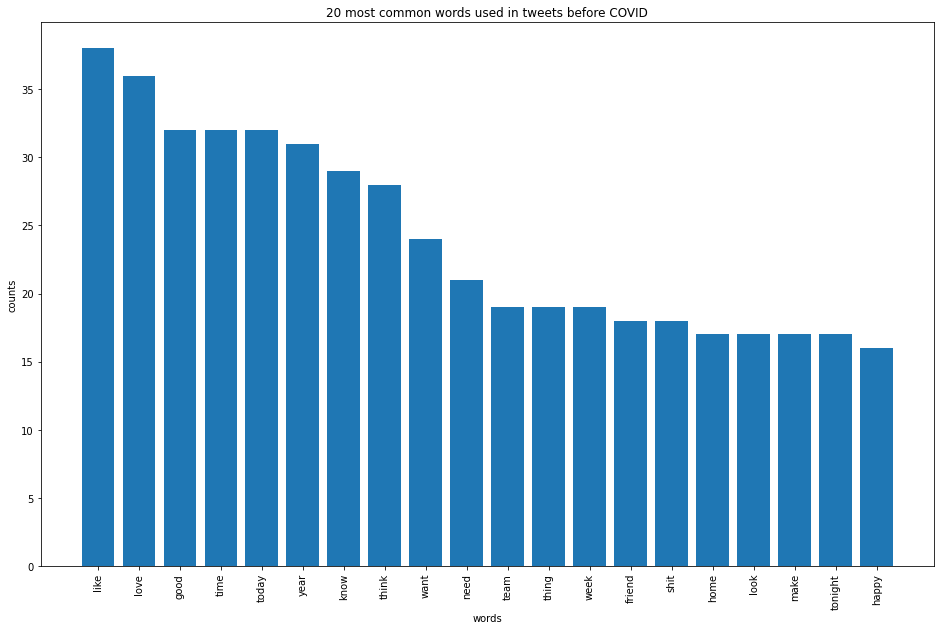

In [88]:
def plot_20_most_common_tokens(data, count_vectorizer ,plot_title):
    tokens = count_vectorizer.get_feature_names()
    tokenCounts = np.zeros(len(tokens))
    for item in data:
        tokenCounts+= item.toarray()[0]
    
    countStore = (zip(tokens, tokenCounts))
    countStore = sorted(countStore, key=lambda x:x[1], reverse=True)[0:20]
    tokens = [w[0] for w in countStore]
    plot_X = [w[1] for w in countStore]
    xcoords = np.arange(len(tokens)) 
    plt.figure(figsize=(16, 10))
    plt.bar(xcoords, plot_X,align='center')
    plt.xticks(xcoords, tokens, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title(plot_title)
    plt.show()
#     plt.savefig("accounts_precovid.png")

count_vectorizer = CountVectorizer(stop_words='english')
data = count_vectorizer.fit_transform(precovid_cleaned_df['tweet'])

# Generating plot
plot_20_most_common_tokens(data, count_vectorizer,'20 most common words used in tweets before COVID')


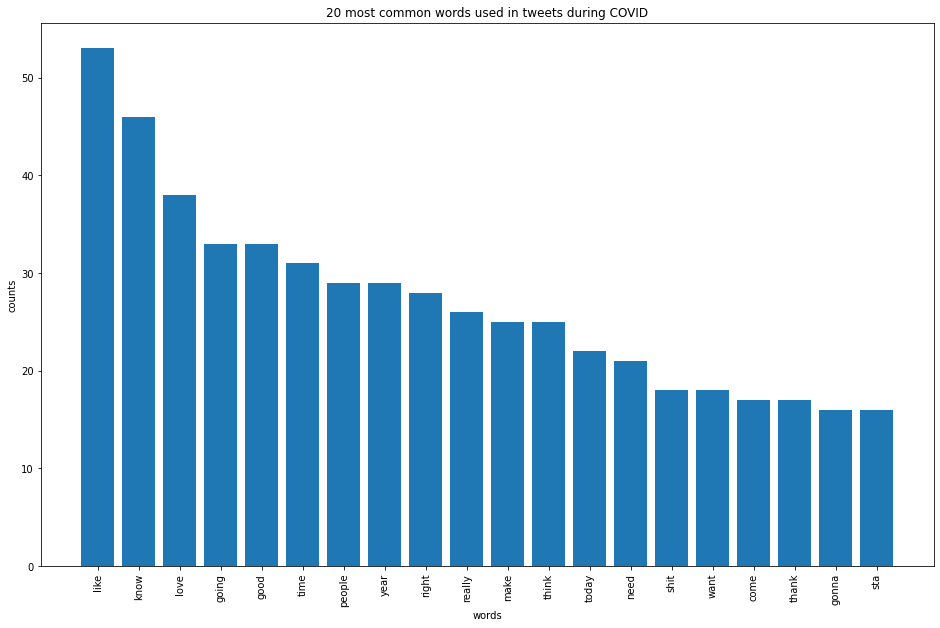

In [89]:
# Use countvectorizer for Fitting and transforming the processed tweets
data = count_vectorizer.fit_transform(covid_timeline_cleaned_df['tweet'])

# Plot a visualization for the 20 most common words
plot_20_most_common_tokens(data, count_vectorizer,'20 most common words used in tweets during COVID')

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

# Precovid vectorization
vectorizer_pre_covid = TfidfVectorizer(stop_words = 'english')
vectors = vectorizer_pre_covid.fit_transform(precovid_cleaned_df['tweet'])
tf_idf_norm = normalize(vectors)
tf_idf_array_precovid = tf_idf_norm.toarray()

# Covid timeline vectorization
vectorizer_covid = TfidfVectorizer(stop_words = 'english')
vectors = vectorizer_covid.fit_transform(covid_timeline_cleaned_df['tweet'])
tf_idf_norm = normalize(vectors)
tf_idf_array_covid = tf_idf_norm.toarray()

In [91]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

def elbow_plot(n_pca_components, tf_idf_array, title):
    sklearn_pca = PCA(n_components = n_pca_components)
    Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
    number_clusters = range(1, 7)
    kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
    score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]

    plt.plot(number_clusters, score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Plot for ' + title)
    plt.show()


def kMeansClustering(n_pca_components, n_clusters, tf_idf_array, title):
    sklearn_pca = PCA(n_components = n_pca_components)
    Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
    kmeans = KMeans(n_clusters=n_clusters, max_iter=600, algorithm = 'auto')
    fitted = kmeans.fit(Y_sklearn)
    prediction = kmeans.predict(Y_sklearn)
    plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')
    plt.title("Scatter plot for " + title)
    plt.show()
    return prediction




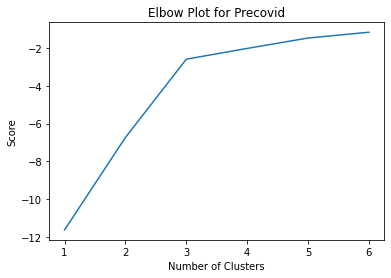

In [92]:
elbow_plot(2, tf_idf_array_precovid, "Precovid")

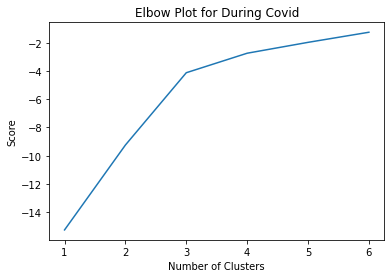

In [93]:
elbow_plot(2, tf_idf_array_covid, "During Covid")

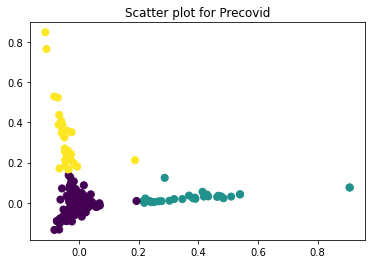

In [94]:
prediction_precovid = kMeansClustering(2, 3, tf_idf_array_precovid, "Precovid")

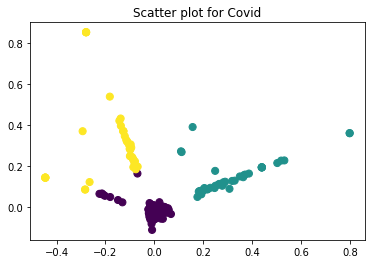

In [95]:
prediction_covid = kMeansClustering(2, 3, tf_idf_array_covid, "Covid")

In [96]:
def get_top_features_per_cluster(tf_idf_vectorizor, tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs


In [97]:
tfc_pre_covid = get_top_features_per_cluster(vectorizer_pre_covid, tf_idf_array_precovid, prediction_precovid, 10)

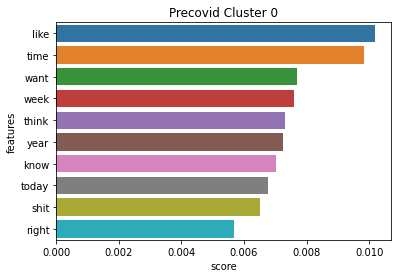

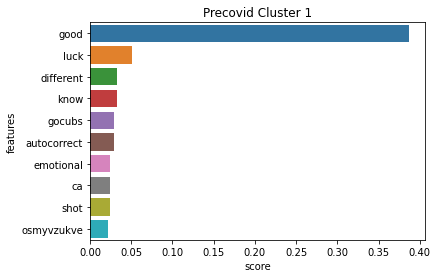

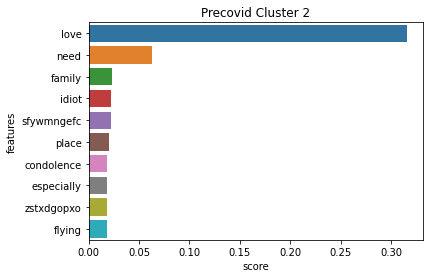

In [98]:
for x in range(0,3):
    sns.barplot(x = 'score' , y = 'features', orient = 'h', data = tfc_pre_covid[x][:10])
    plt.title("Precovid Cluster " + str(x))
    plt.show()

In [99]:
tfc_covid = get_top_features_per_cluster(vectorizer_covid, tf_idf_array_covid, prediction_covid, 10)

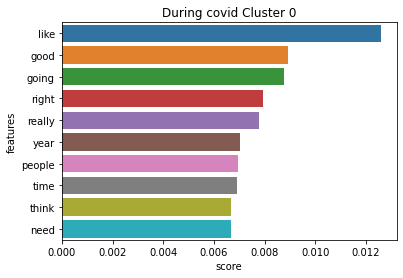

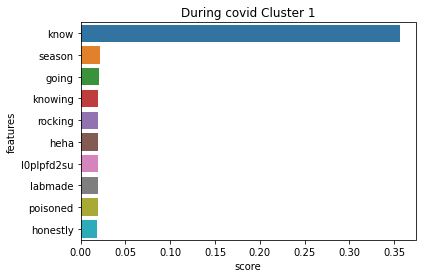

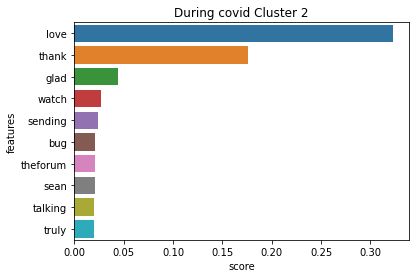

In [100]:
for x in range(0,3):
    sns.barplot(x = 'score' , y = 'features', orient = 'h', data = tfc_covid[x][:10])
    plt.title("During covid Cluster " + str(x))
    plt.show()